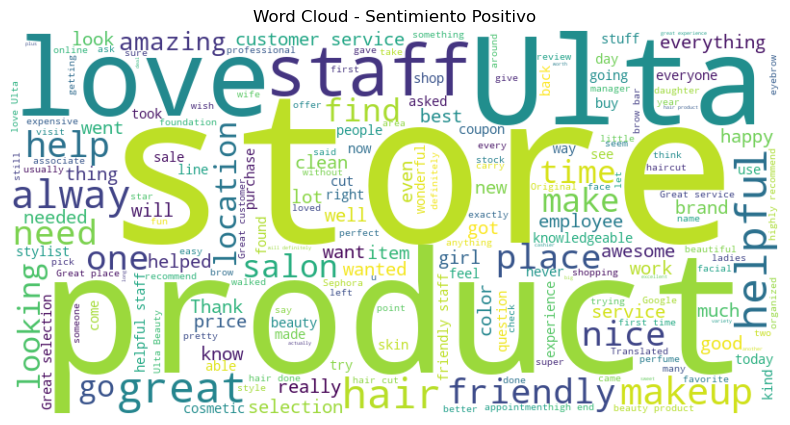

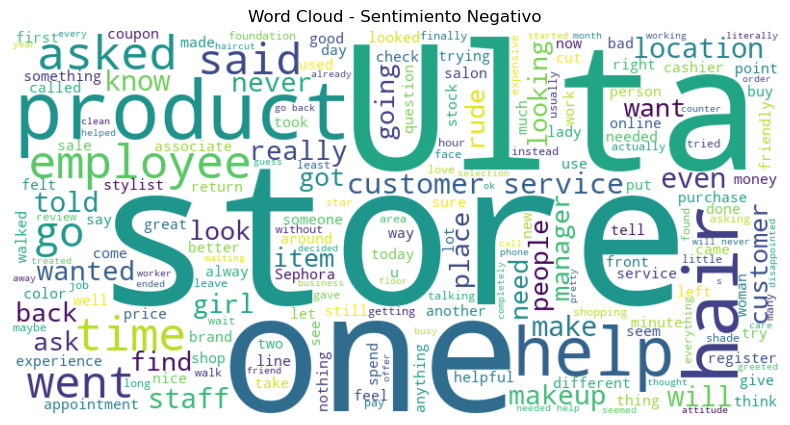

In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Especifica la ruta del archivo CSV
ruta_csv = r'C:\Users\johan\Bootcamp_SoyHenry\PI_Final\sentiment_analysis.csv'

# Lee el archivo CSV en un DataFrame
df = pd.read_csv(ruta_csv)

# Filtrar por sentimiento positivo (sentiment=1) y negativo (sentiment=0)
positive_text = ' '.join(df[df['sentiment'] == 1]['text'])
negative_text = ' '.join(df[df['sentiment'] == 0]['text'])

# Crear un objeto WordCloud para sentimiento positivo
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Crear un objeto WordCloud para sentimiento negativo
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Mostrar el gráfico de nube de palabras para sentimiento positivo
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Sentimiento Positivo')
plt.axis('off')
plt.show()

# Mostrar el gráfico de nube de palabras para sentimiento negativo
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Sentimiento Negativo')
plt.axis('off')
plt.show()

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Especifica la ruta del archivo CSV
ruta_csv = r'C:\Users\johan\Bootcamp_SoyHenry\PI_Final\sentiment_analysis.csv'

# Lee el archivo CSV en un DataFrame
df = pd.read_csv(ruta_csv)

# Filtrar por sentimiento negativo (sentiment=0)
negative_reviews = df[df['sentiment'] == 0]['text']

# Crear un objeto WordCloud para sentimiento negativo
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Obtener las palabras clave del top 10
palabras_clave = list(wordcloud_negative.words_.keys())[:10]

# Crear DataFrames separados para cada palabra clave
dataframes_por_palabra_clave = {}

for palabra_clave in palabras_clave:
    # Filtrar reseñas que contienen la palabra clave actual
    reseñas_con_palabra_clave = negative_reviews[negative_reviews.str.contains(palabra_clave, case=False)]
    
    # Crear un nuevo DataFrame con las reseñas filtradas
    df_palabra_clave = pd.DataFrame({'Reseñas Negativas': reseñas_con_palabra_clave})
    
    # Agregar la palabra clave como una columna en el DataFrame
    df_palabra_clave['Palabra Clave'] = palabra_clave
    
    # Guardar el DataFrame en el diccionario
    dataframes_por_palabra_clave[palabra_clave] = df_palabra_clave

# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(dataframes_por_palabra_clave.values(), ignore_index=True)

# Guardar el DataFrame combinado en un archivo CSV
df_final.to_csv('reseñas_con_palabras_clave.csv', index=False)


In [4]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Cargar el archivo CSV con las reseñas y palabras clave
df = pd.read_csv('reseñas_con_palabras_clave.csv')

# Cargar el modelo de spaCy en inglés
nlp = spacy.load('en_core_web_sm')

# Función para lematizar y preprocesar el texto
def preprocess_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join(token.lemma_ for token in doc if token.is_alpha)
    return lemmatized_text

# Aplicar preprocesamiento al texto de las reseñas
df['Processed Text'] = df['Reseñas Negativas'].apply(preprocess_text)

# Crear una representación vectorial del texto utilizando CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Processed Text'])

# Aplicar el modelo de Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Mostrar los temas y las palabras clave asociadas
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f'Tema {topic_idx + 1}: {", ".join(top_keywords)}')

# Asignar un tema a cada reseña
df['Tema Asignado'] = lda.transform(X).argmax(axis=1)

# Guardar el DataFrame con temas asignados en un nuevo archivo CSV
df.to_csv('reseñas_con_temas.csv', index=False)


Tema 1: help, store, like, look, ask, ulta, time, product, makeup, employee
Tema 2: say, product, just, want, like, ulta, color, make, return, ask
Tema 3: hair, cut, say, salon, appointment, tell, want, time, ask, color
Tema 4: hair, salon, time, stylist, ulta, appointment, tell, just, look, pay
Tema 5: store, ulta, customer, product, help, service, ask, employee, time, say


OpenAI

Tema 1 (Posiblemente relacionado con productos y ayuda en la tienda), el Tema 2 (Posiblemente relacionado con opiniones sobre productos y devoluciones), Tema 3 (Posiblemente relacionado con servicios de salón y cortes de cabello), Tema 4 (Posiblemente relacionado con experiencias en el salón y pagos), Tema 5 (Posiblemente relacionado con servicio al cliente en la tienda)